## Ciência de dados - privisão de preços

O objetivo desse notebook é prever o preço de celulares baseados nas características do celular como: peso (g),  pixels por polegada (PPI), processador (GHz), memoria interna (GB), pixels da câmera traseira (MP), bateria (mpA) e espessura (mm).

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [64]:
# Importando a base de dados

tabela = pd.read_csv('celular_train.csv', sep=";")
tabela.tail(5)

,Valor,Peso,PPI,CPU Freq,M. Interna,C. Traseira,Bateria,Espessura
148,3551,178.0,538,1.875,128.0,12.0,4080,8.4
149,3211,170.0,534,1.975,128.0,20.0,3400,7.9
150,3260,150.0,401,2.200,64.0,20.0,3000,6.8
151,3211,170.0,534,1.975,128.0,20.0,3400,7.9
152,2536,202.0,367,1.500,16.0,21.5,2700,8.4


In [65]:
# Analisando a estrutura da base de dados

tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Valor        153 non-null    int64  
 1   Peso         153 non-null    float64
 2   PPI          153 non-null    int64  
 3   CPU Freq     153 non-null    float64
 4   M. Interna   153 non-null    float64
 5   C. Traseira  153 non-null    float64
 6   Bateria      153 non-null    int64  
 7   Espessura    153 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 9.7 KB


In [66]:
# Calculando a correlação

display(tabela.corr()[["Valor"]].drop("Valor", axis=0))# correlação (influencia) de cada componente com o valor final do celular

,Valor
Peso,0.053859
PPI,0.790471
CPU Freq,0.597533
M. Interna,0.787928
C. Traseira,0.686975
Bateria,0.486570
Espessura,-0.645850


<AxesSubplot:>

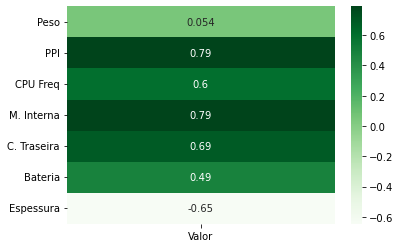

In [67]:
# Análise Gráfica da correlação

sns.heatmap(tabela.corr()[["Valor"]].drop("Valor", axis=0), cmap="Greens", annot=True)

In [68]:
# Separando a base em dados de X e Y

y = tabela["Valor"]
x = tabela.drop("Valor", axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

In [69]:
# Criando a inteligencia artificial
regressaolinear = LinearRegression()
arvoredecisao = RandomForestRegressor()

# Treinando a inteligencia artificial
regressaolinear.fit(x_treino, y_treino)
arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [70]:
# Analisando a precisão de cada um dos modelos de inteligencia artificial

previsao_regressaolinear = regressaolinear.predict(x_teste)
previsao_arvoredecisao = arvoredecisao.predict(x_teste)

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.8585943863770685
0.9338757854402869


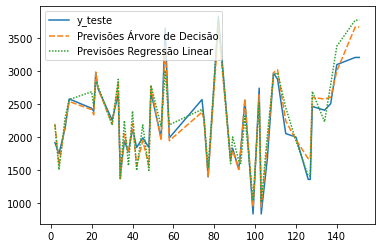

In [73]:
# Análise gráfica da precisão

tabela_aux = pd.DataFrame()
tabela_aux['y_teste'] = y_teste
tabela_aux['Previsões Árvore de Decisão'] = previsao_arvoredecisao
tabela_aux['Previsões Regressão Linear'] = previsao_regressaolinear

sns.lineplot(data=tabela_aux)
plt.show()

In [80]:
# Prevendo valores de outros celulares

tabela_nova = pd.read_csv("celular_new.csv", sep=";")
display(tabela_nova)

previsao = arvoredecisao.predict(tabela_nova)
print("Previsão dos valores dos novos celulares :", previsao)

,Peso,PPI,CPU Freq,M. Interna,C. Traseira,Bateria,Espessura
0,125,510,2.4,32,11,3000,8.2
1,175,303,1.3,4,4,2100,11.2
2,152,400,2.0,16,8,3500,9.0


Previsão dos valores dos novos celulares : [2906.92 1833.77 2420.54]
